In [2]:
from skyfield.api import load
from skyfield.framelib import ecliptic_frame
import numpy as np

planets = load('de430t.bsp')
ts = load.timescale()
sun = planets['sun']
earth = planets['earth barycenter']
neptune = planets['neptune barycenter']

t = ts.utc(2023, 10, 1, 0, 0)

In [2]:
#1
neptune_position = neptune.at(t).position.au
print(f"Neptune distance in AU: {np.linalg.norm(neptune_position)}")
earth_position = earth.at(t).position.au
print(f"Earth distance in AU: {np.linalg.norm(earth_position)}")

Neptune distance in AU: 29.897846359936675
Earth distance in AU: 0.9928297989603362


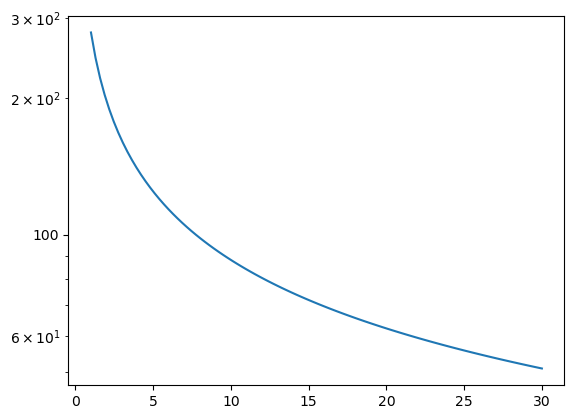

In [3]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
distance = np.linspace(1,30,100)

solar_constant = 1361
stefan_boltzmann_constant = 5.67e-8
T = (solar_constant / distance**2 /(4*stefan_boltzmann_constant))**0.25
plot = ax.plot(distance, T, label='Solar constant')

ax.set_yscale('log')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
plt.show()


https://www.spacex.com/media/falcon-users-guide-2025-03-14.pdf
Page 34 - ESI
Page 39 - Random Vibration

Launch loads that I need to sustain:

In [4]:
diameter = 0.2 #cm

cb = 0.25
rho_p = 5
rho_b = 2.7

t_b = cb  * diameter * rho_p / rho_b

cw = 0.16 #cm^2-sec (g^2/3 km)
Mp = 0.75 * np.pi * (diameter/2)**3 * rho_p #g
sigma = 50 #ksi
Vn = 10#km/s
S = 10 #cm

t_w = cw * diameter**0.5 * (rho_b * rho_p)**(1/6) * (Mp)**(1/3) * Vn / S**0.5 * (70/sigma)**0.5

print(f"t_b: {t_b}")
print(f"t_w: {t_w}")

height = 4 #m
width = 2 #m

area = height * width
mass_panel = area * (t_b + t_w) / 100 * rho_b * 1000
mass = 4 * mass_panel
print(f"mass per panel: {mass_panel} mass: {mass}")

t_b: 0.09259259259259259
t_w: 0.09400443421727941
mass per panel: 40.304957790932356 mass: 161.21983116372942
